In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
X = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_x.csv",header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_y.csv",header=None)

In [ ]:
X.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [ ]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


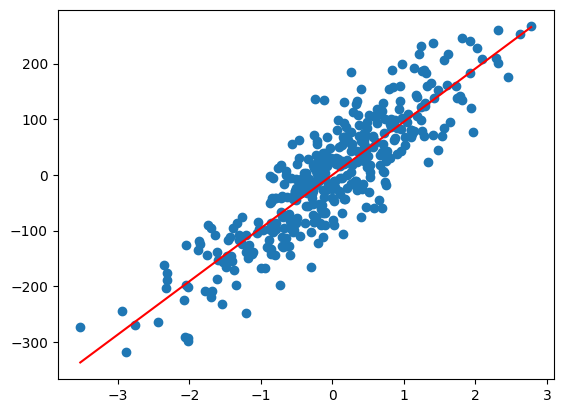

In [ ]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_
binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

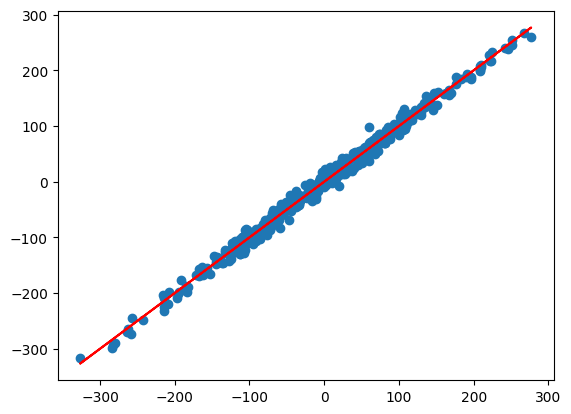

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

Ошибка после градиентного спуска: 5746.141065134869


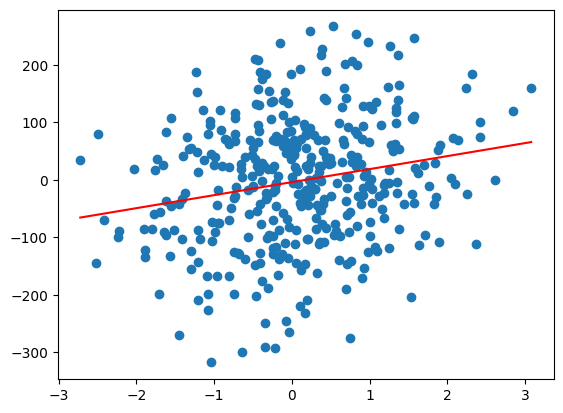

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 1
        self.b1 = 1

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.values
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001):
        if isinstance(X, pd.Series):
            X = X.values
        steps, errors = [], []
        step = 0
        for _ in range(5000):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

    def plot(self, X, Y):
        plt.figure()
        plt.scatter(X, Y)
        X_min, X_max = min(X), max(X)
        Y_min = self.predict(X_min)
        Y_max = self.predict(X_max)
        plt.plot([X_min, X_max], [Y_min, Y_max], 'r')
        plt.show()



hyp = Model()

steps, errors = hyp.fit(x[0], y[0])
J = hyp.error(x[0], y[0])
print("Ошибка после градиентного спуска:", J)

hyp.plot(x[0], y[0])

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(X)
x_poly

array([[ 7.18411922e-02,  8.55352414e-01, -3.05596614e-01, ...,
         7.98207711e-04,  5.16144893e-02,  3.33754670e+00],
       [ 1.39521454e-01, -4.23506701e-01,  4.61059013e-01, ...,
         2.00166735e-01,  1.56534519e-02,  1.22413226e-03],
       [ 1.62631129e+00, -2.57621679e-01, -6.97519642e-01, ...,
         1.99718849e+00,  1.53516867e+00,  1.18003026e+00],
       ...,
       [-4.57140543e-01,  9.40791148e-01, -6.60269560e-01, ...,
         5.40868523e+00, -3.51187134e+00,  2.28026587e+00],
       [-3.44277715e-01, -1.20980548e+00, -2.11972090e+00, ...,
         2.20792023e+00,  2.49169934e-01,  2.81195194e-02],
       [-1.34911367e+00,  7.15605259e-01,  1.27304466e+00, ...,
         6.12758536e-01, -5.35207989e-01,  4.67472217e-01]])

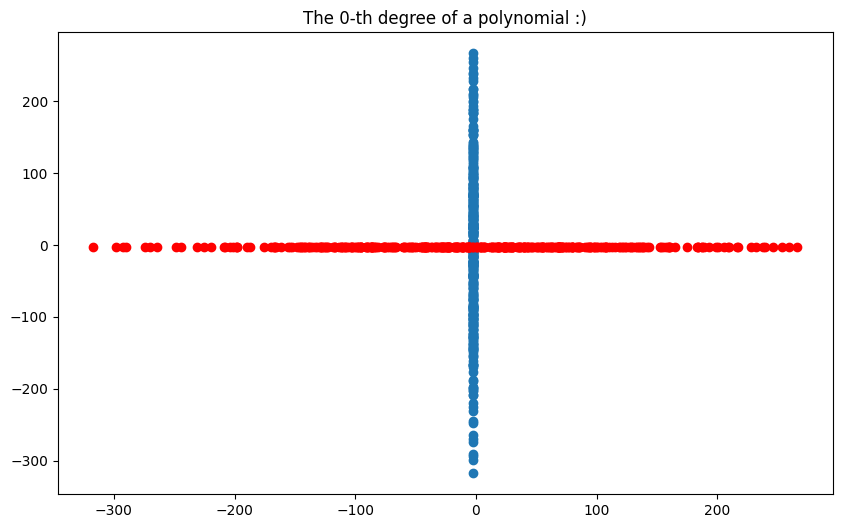

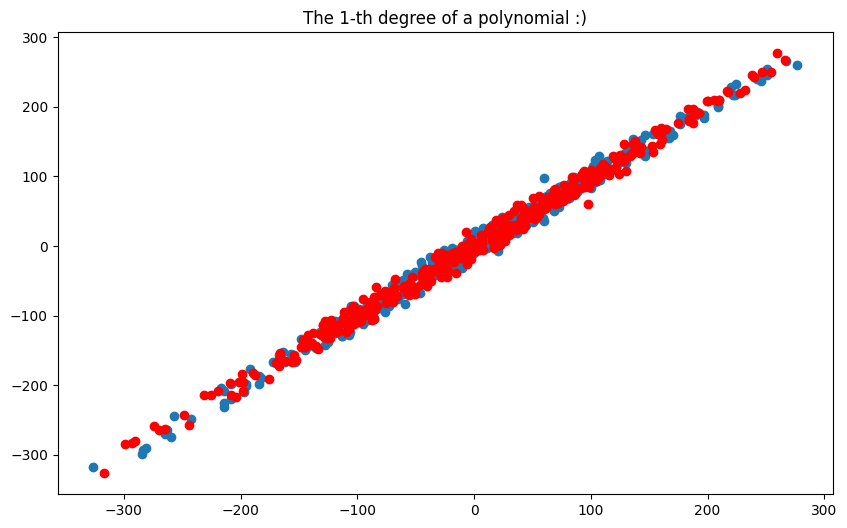

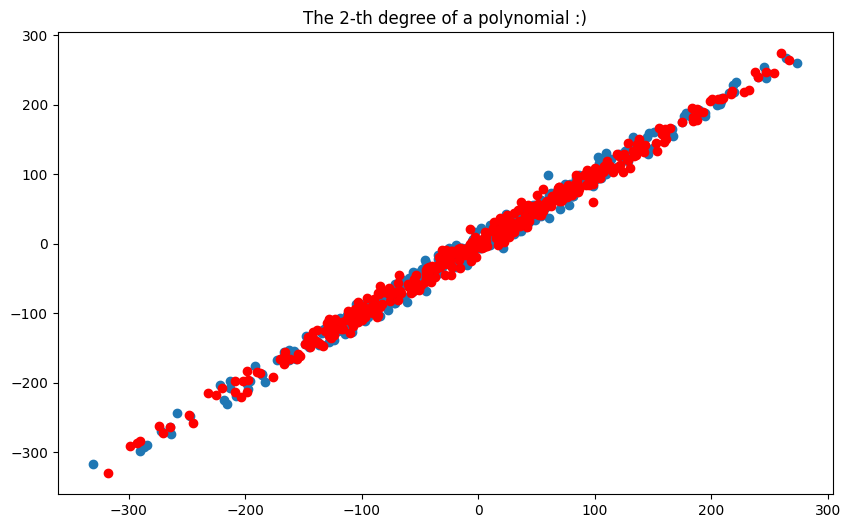

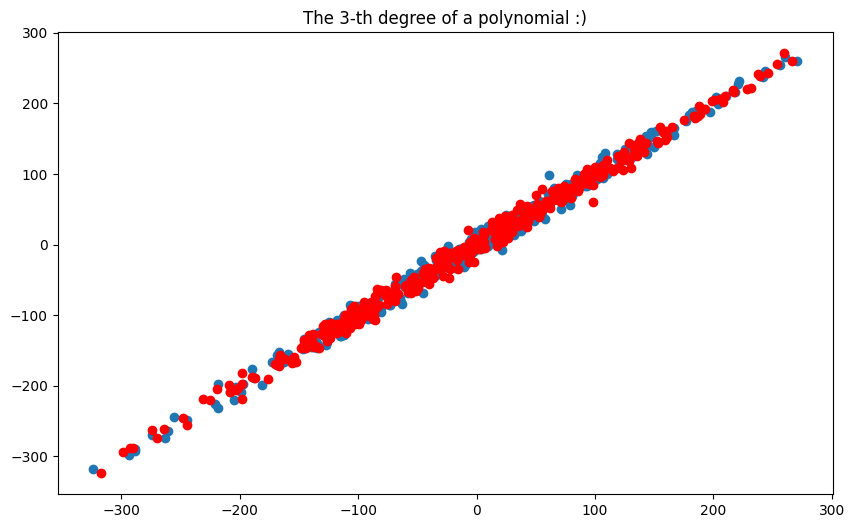

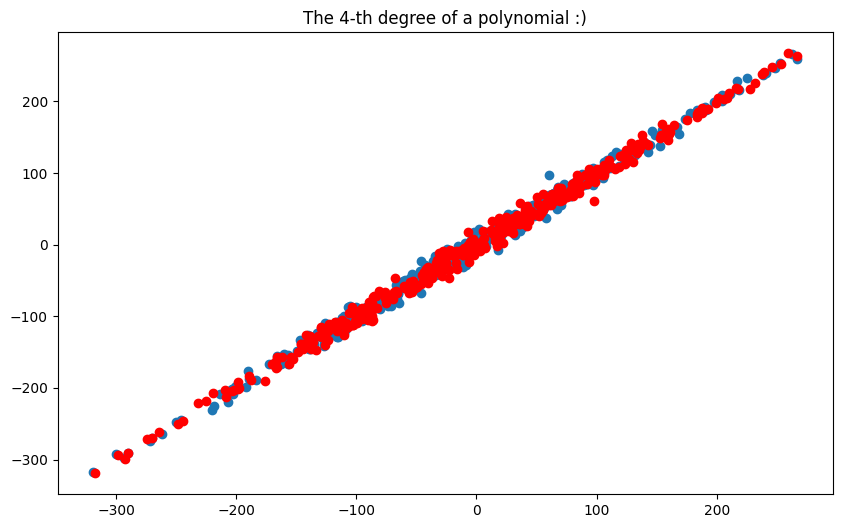

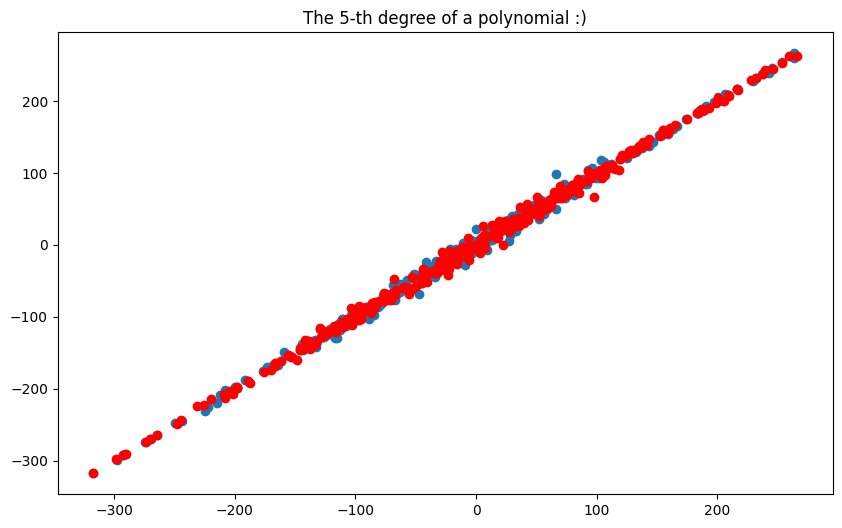

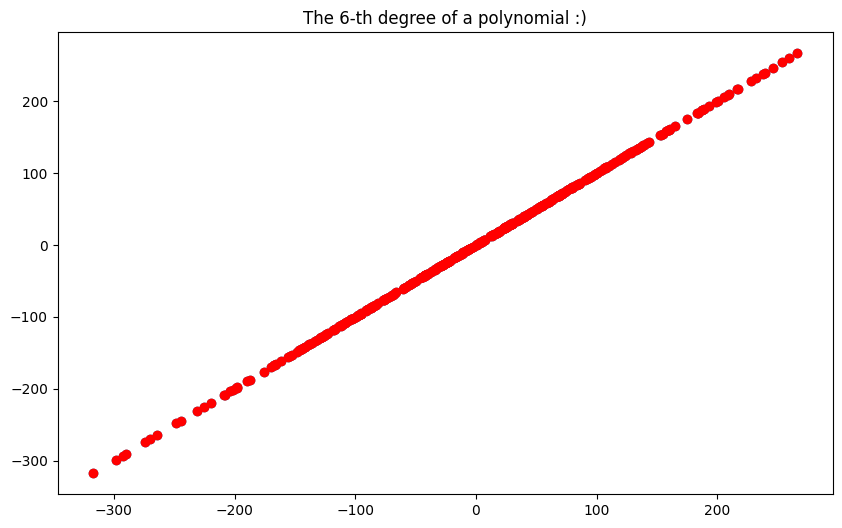

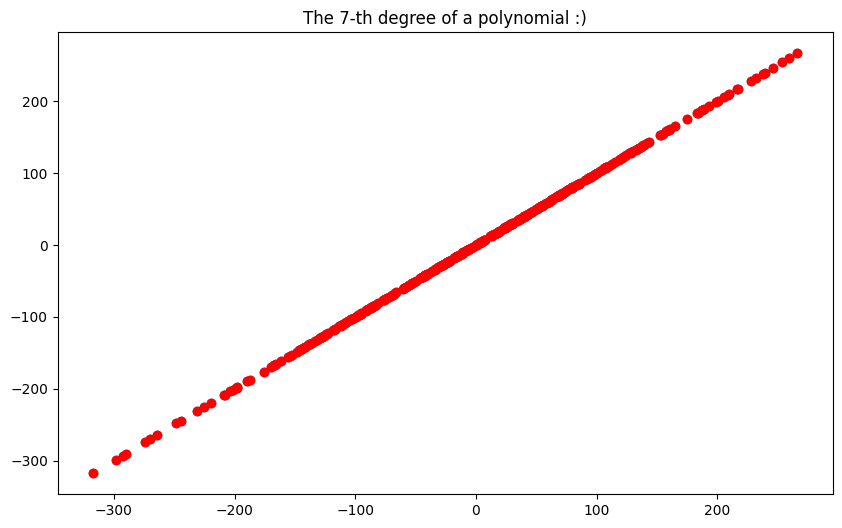

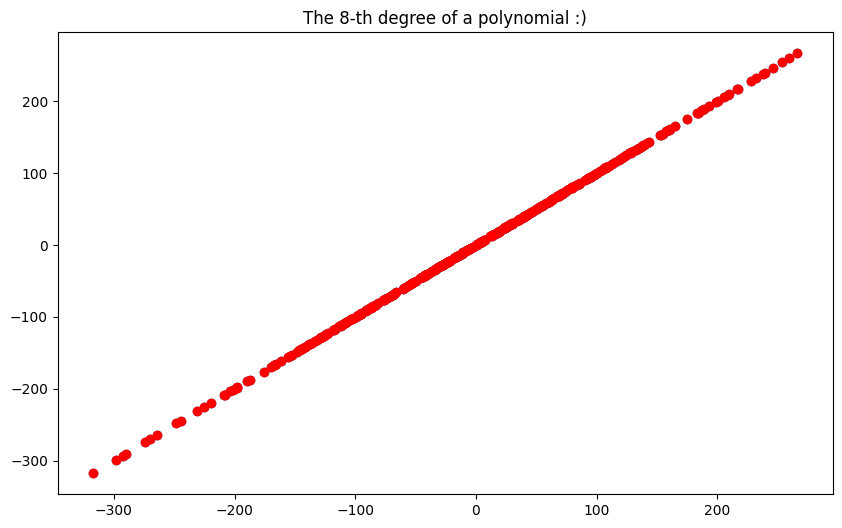

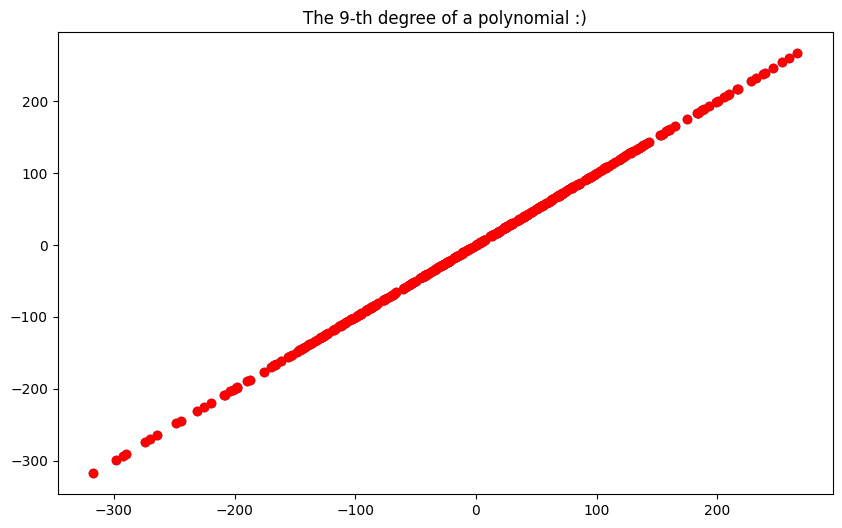

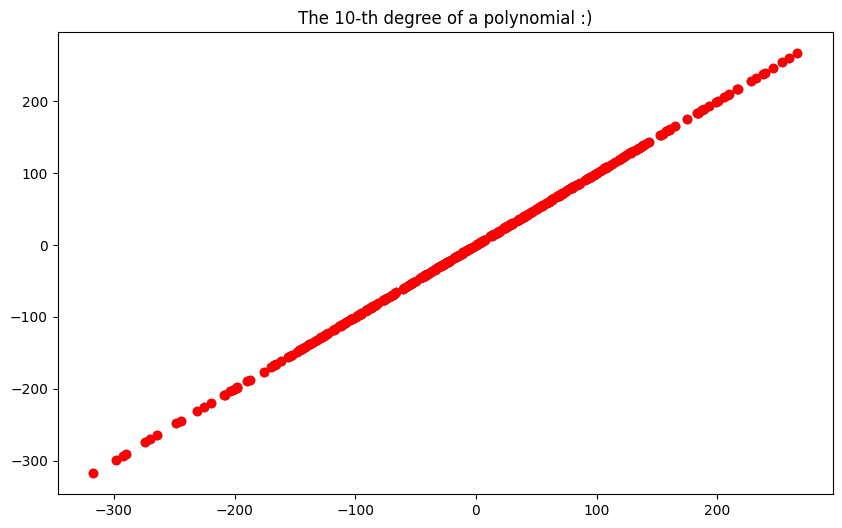

    Degree  Duration        R2     Score           MSE
0        0  0.048190  0.000000  0.000000  1.201670e+04
1        1  0.028624  0.992159  0.992220  9.349229e+01
2        2  0.030223  0.992545  0.992600  8.891857e+01
3        3  0.052908  0.993146  0.993192  8.180684e+01
4        4  0.067409  0.994335  0.994367  6.769318e+01
5        5  0.041077  0.997224  0.997232  3.326649e+01
6        6  0.073469  1.000000  1.000000  6.751457e-23
7        7  0.092322  1.000000  1.000000  2.217778e-22
8        8  0.123551  1.000000  1.000000  2.491462e-21
9        9  0.159010  1.000000  1.000000  2.418734e-20
10      10  0.192514  1.000000  1.000000  3.293677e-19


In [ ]:
a =[]
for i in range(11):
  start = time.time()
  poly = PolynomialFeatures(degree=i)
  x_poly = poly.fit_transform(X)
  model = LinearRegression()
  model.fit(x_poly, y)
  y_pred = model.predict(x_poly)

  r2 = r2_score(y_pred, y)
  score = model.score(x_poly, y)
  mse = mean_squared_error(y_pred, y)
  dur = time.time() - start

  plt.figure(figsize=(10, 6))
  plt.title(f'The {i}-th degree of a polynomial :)')
  plt.scatter(y_pred, y)
  plt.scatter(y, y_pred, c="red")
  plt.show()

  a.append([i, dur, r2, score, mse])

df = pd.DataFrame(a, columns=["Degree", "Duration", "R2", "Score", "MSE"])
print(df)

Судя по значениям точности, все модели показывают достаточно высокую точность, кроме модели с 0 порядком. Модель с самой высокой точностью - модельс  порядком 9. Модель с порядком 10 уже может быть переобученной, поскольку её параментр MSE начинает расти